In [ ]:
import cv2
import numpy as np

def convert_real_image_to_mnist(input_path, mnist_size=(28, 28)):
    image = cv2.imread(input_path)
    if image is None:
        print("خطأ: لا يمكن قراءة الصورة. تأكد من صحة المسار.")
        return None
        
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((3, 3), np.uint8)
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print("لم يتم العثور على أي شكل في الصورة.")
        return None

    all_points = np.concatenate([c for c in contours])
    x, y, w, h = cv2.boundingRect(all_points)
    cropped = cleaned[y:y+h, x:x+w]
    h, w = cropped.shape
    target_dim = max(h, w)
    
    pad_vert = (target_dim - h) // 2
    pad_horz = (target_dim - w) // 2
    padded = cv2.copyMakeBorder(cropped, pad_vert, pad_vert, pad_horz, pad_horz, cv2.BORDER_CONSTANT, value=0)
    resized = cv2.resize(padded, mnist_size, interpolation=cv2.INTER_AREA)
    final_image = cv2.GaussianBlur(resized, (3, 3), 0)

    return final_image


def fill_pixel_gaps(image):
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    kernel = np.ones((4, 4), np.uint8)
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
    return dilated_image


def erode_white_area(image):
    kernel = np.ones((3, 3), np.uint8)
    eroded_image = cv2.erode(image, kernel, iterations=1)
    return eroded_image


def process_image(input_file, output_file):
    mnist_image = convert_real_image_to_mnist(input_file)
    if mnist_image is None:
        return

    processed_image = fill_pixel_gaps(mnist_image)
    final_image = erode_white_area(processed_image)
    cv2.imwrite(output_file, final_image)
    print(f"تمت معالجة الصورة بنجاح وحفظها في: {output_file}")


if __name__ == "__main__":
    input_file = '9.png'
    output_file = 'final_processed_digit.png'
    process_image(input_file, output_file)

In [ ]:
import tkinter as tk
from PIL import Image
import numpy as np
import cv2
from tensorflow import keras
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename

model = keras.models.load_model("mnist_model4.keras")

CANVAS_SIZE = 280
IMAGE_SIZE = 28

root = tk.Tk()
root.title("Analyze Image for Digit Recognition")
root.geometry("400x500")

def load_image():
    file_path = askopenfilename(title="Select Image", filetypes=[("", "*.png;*.jpg;*.jpeg")])
    if file_path:
        img = Image.open(file_path).convert("L")
        img = img.resize((28, 28))
        show_image_before_predict(img)
        process_and_predict(img)

def show_image_before_predict(img):
    img_array = np.array(img)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(img_array, cmap='gray')
    plt.title("Image Before Model")
    plt.axis('off')
    plt.show()

def process_and_predict(img):
    img_array = np.array(img)
    img_normalized = img_array / 255.0
    img_for_model = img_normalized.reshape(1, 28, 28, 1)
    predictions = model.predict(img_for_model, verbose=0)
    top_3_indices = np.argsort(predictions[0])[-3:][::-1]
    top_3_probs = predictions[0][top_3_indices] * 100

    result_text = f"🎯 Top 3 Predictions:\n"
    for i, index in enumerate(top_3_indices):
        result_text += f"{i+1}. Digit: {index} - {top_3_probs[i]:.1f}%\n"

    result_label.config(text=result_text, fg="green")

    plt.figure(figsize=(5, 5))
    plt.imshow(img_array, cmap='gray')
    plt.title(f"Top 3 Predictions")
    plt.axis('off')
    plt.show()

load_image_btn = tk.Button(root, text="📂 Load Image", command=load_image, 
                           font=('Arial', 12), bg='lightblue')
load_image_btn.pack(pady=5)

result_label = tk.Label(root, text="Prediction: ", font=('Arial', 12, 'bold'))
result_label.pack(pady=5)

confidence_label = tk.Label(root, text="", font=('Arial', 10), justify='left')
confidence_label.pack(pady=5)

instructions = tk.Label(root, text="Click 'Load Image' to select an image", 
                       font=('Arial', 10), fg='gray')
instructions.pack(pady=10)

root.mainloop()

In [ ]:
import cv2
import numpy as np

def convert_real_image_to_mnist(input_path, mnist_size=(28, 28)):
    image = cv2.imread(input_path)
    if image is None:
        print("خطأ: لا يمكن قراءة الصورة. تأكد من صحة المسار.")
        return None
        
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((3, 3), np.uint8)
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    h, w = cleaned.shape
    target_dim = max(h, w)
    
    pad_vert = (target_dim - h) // 2
    pad_horz = (target_dim - w) // 2
    padded = cv2.copyMakeBorder(cleaned, pad_vert, pad_vert, pad_horz, pad_horz, cv2.BORDER_CONSTANT, value=0)
    resized = cv2.resize(padded, mnist_size, interpolation=cv2.INTER_AREA)
    final_image = cv2.GaussianBlur(resized, (3, 3), 0)

    return final_image


def fill_pixel_gaps(image):
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    kernel = np.ones((3, 3), np.uint8)
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
    return dilated_image


def erode_white_area(image):
    kernel = np.ones((3, 3), np.uint8)
    eroded_image = cv2.erode(image, kernel, iterations=1)
    return eroded_image


def process_image(input_file, output_file):
    mnist_image = convert_real_image_to_mnist(input_file)
    if mnist_image is None:
        return

    processed_image = fill_pixel_gaps(mnist_image)
    final_image = erode_white_area(processed_image)
    cv2.imwrite(output_file, final_image)
    print(f"تمت معالجة الصورة بنجاح وحفظها في: {output_file}")


if __name__ == "__main__":
    input_file = '1.png'
    output_file = 'final_processed_digit.png'
    process_image(input_file, output_file)

In [ ]:
!pip install scikit-image



In [ ]:
import cv2
import numpy as np
import tkinter as tk
from PIL import Image
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
from tensorflow import keras

model = keras.models.load_model("mnist_model4.keras")

CANVAS_SIZE = 280
IMAGE_SIZE = 28

root = tk.Tk()
root.title("Digit Recognition - Image Analysis")
root.geometry("400x500")

def convert_real_image_to_mnist(input_path, mnist_size=(28, 28)):
    image = cv2.imread(input_path)
    if image is None:
        print("Error: Unable to read the image. Please check the file path.")
        return None
        
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((3, 3), np.uint8)
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print("No shape detected in the image.")
        return None

    all_points = np.concatenate([c for c in contours])
    x, y, w, h = cv2.boundingRect(all_points)
    cropped = cleaned[y:y+h, x:x+w]

    h, w = cropped.shape
    target_dim = max(h, w)
    pad_vert = (target_dim - h) // 2
    pad_horz = (target_dim - w) // 2
    padded = cv2.copyMakeBorder(cropped, pad_vert, pad_vert, pad_horz, pad_horz, cv2.BORDER_CONSTANT, value=0)
    resized = cv2.resize(padded, mnist_size, interpolation=cv2.INTER_AREA)

    final_image = cv2.GaussianBlur(resized, (3, 3), 0)
    return final_image

def fill_pixel_gaps(image):
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    kernel = np.ones((4, 4), np.uint8)
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
    return dilated_image

def erode_white_area(image):
    kernel = np.ones((3, 3), np.uint8)
    eroded_image = cv2.erode(image, kernel, iterations=1)
    return eroded_image

def process_and_predict_image(input_path):
    mnist_image = convert_real_image_to_mnist(input_path)
    if mnist_image is None:
        return

    processed_image = fill_pixel_gaps(mnist_image)
    final_image = erode_white_area(processed_image)

    img_array = np.array(final_image)
    plt.figure(figsize=(5, 5))
    plt.imshow(img_array, cmap='gray')
    plt.title("Image Before Model")
    plt.axis('off')
    plt.show()

    img_normalized = img_array / 255.0
    img_for_model = img_normalized.reshape(1, 28, 28, 1)

    predictions = model.predict(img_for_model, verbose=0)

    predicted_digit = np.argmax(predictions[0])
    prediction_prob = np.max(predictions[0]) * 100

    result_text = f"🎯 Predicted Digit: {predicted_digit} - {prediction_prob:.1f}%"
    result_label.config(text=result_text, fg="green")

def select_and_process_image():
    file_path = askopenfilename(title="Select an Image", filetypes=[("", "*.png;*.jpg;*.jpeg")])
    if file_path:
        process_and_predict_image(file_path)

load_image_btn = tk.Button(root, text="📂 Load Image", command=select_and_process_image, 
                           font=('Arial', 12), bg='lightblue')
load_image_btn.pack(pady=5)

result_label = tk.Label(root, text="Prediction: ", font=('Arial', 12, 'bold'))
result_label.pack(pady=5)

instructions = tk.Label(root, text="Click 'Load Image' to select an image for prediction", 
                       font=('Arial', 10), fg='gray')
instructions.pack(pady=10)

root.mainloop()

In [ ]:
from tensorflow.keras.layers import MaxPooling2D, Dropout

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
from tensorflow.keras.layers import Flatten

model.add(Flatten())

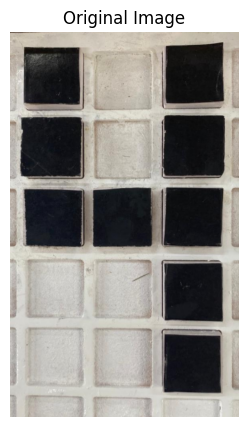

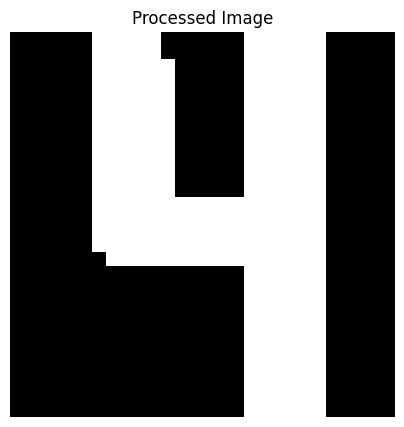

In [ ]:
import cv2
import numpy as np
import tkinter as tk
from PIL import Image
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
from tensorflow import keras

model = keras.models.load_model("mnist_model4.keras")

CANVAS_SIZE = 280
IMAGE_SIZE = 28

root = tk.Tk()
root.title("Digit Recognition - Image Analysis")
root.geometry("400x500")

def convert_real_image_to_mnist(input_path, mnist_size=(28, 28)):
    image = cv2.imread(input_path)
    if image is None:
        print("Error: Unable to read the image. Please check the file path.")
        return None
        
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((3, 3), np.uint8)
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print("No shape detected in the image.")
        return None

    all_points = np.concatenate([c for c in contours])
    x, y, w, h = cv2.boundingRect(all_points)
    cropped = cleaned[y:y+h, x:x+w]

    h, w = cropped.shape
    target_dim = max(h, w)
    pad_vert = (target_dim - h) // 2
    pad_horz = (target_dim - w) // 2
    padded = cv2.copyMakeBorder(cropped, pad_vert, pad_vert, pad_horz, pad_horz, cv2.BORDER_CONSTANT, value=0)
    resized = cv2.resize(padded, mnist_size, interpolation=cv2.INTER_AREA)

    final_image = cv2.GaussianBlur(resized, (3, 3), 0)
    return final_image

def fill_pixel_gaps(image):
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    kernel = np.ones((4, 4), np.uint8)
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
    return dilated_image

def erode_white_area(image):
    kernel = np.ones((3, 3), np.uint8)
    eroded_image = cv2.erode(image, kernel, iterations=1)
    return eroded_image

def process_and_predict_image(input_path):
    mnist_image = convert_real_image_to_mnist(input_path)
    if mnist_image is None:
        return

    processed_image = fill_pixel_gaps(mnist_image)
    final_image = erode_white_area(processed_image)

    original_img = cv2.imread(input_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5, 5))
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    processed_img = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5, 5))
    plt.imshow(processed_img)
    plt.title("Processed Image")
    plt.axis('off')
    plt.show()

    img_normalized = final_image / 255.0
    img_for_model = img_normalized.reshape(1, 28, 28, 1)

    predictions = model.predict(img_for_model, verbose=0)

    predicted_digit = np.argmax(predictions[0])
    prediction_prob = np.max(predictions[0]) * 100

    result_text = f"🎯 Predicted Digit: {predicted_digit} - {prediction_prob:.1f}%"
    result_label.config(text=result_text, fg="green")

def select_and_process_image():
    file_path = askopenfilename(title="Select an Image", filetypes=[("", "*.png;*.jpg;*.jpeg")])
    if file_path:
        process_and_predict_image(file_path)

load_image_btn = tk.Button(root, text="📂 Load Image", command=select_and_process_image, 
                           font=('Arial', 12), bg='lightblue')
load_image_btn.pack(pady=5)

result_label = tk.Label(root, text="Prediction: ", font=('Arial', 12, 'bold'))
result_label.pack(pady=5)

instructions = tk.Label(root, text="Click 'Load Image' to select an image for prediction", 
                       font=('Arial', 10), fg='gray')
instructions.pack(pady=10)

root.mainloop()

In [ ]:
model.add(Dense(94, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=8, 
    batch_size=128
)

In [ ]:
eval_results = model.evaluate(X_test, y_test)

print(f"Test Loss: {eval_results[0]:.4f}, Test Accuracy: {eval_results[1]:.4f}")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()

In [ ]:
import random

num_samples = 10
indices = random.sample(range(len(X_test)), num_samples)
sample_images = X_test[indices]
sample_labels = np.argmax(y_test[indices], axis=1)

predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

for i in range(num_samples):
    axes[i].imshow(sample_images[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Actual: {label_encoder.inverse_transform([sample_labels[i]])[0]}\nPredicted: {label_encoder.inverse_transform([predicted_labels[i]])[0]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
indices_not_5 = np.where(y_train != 5)[0]
correct_not_5 = 0

for idx in indices_not_5:
    img = X_train[:, idx].reshape(784, 1)
    pred = predict(img, parameters)
    if pred[0, 0] == 0:
        correct_not_5 += 1

accuracy_not_5 = correct_not_5 / len(indices_not_5) * 100
print(f"Accuracy on all training images NOT digit 5: {accuracy_not_5:.2f}%")

In [ ]:
!pip install pillow opencv-python


In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def find_and_connect_black_pieces(image_path, output_path=None):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    
    _, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
    
    contours, _ = cv2.findContours(255 - binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    black_pieces_centers = []
    min_area = 500
    
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                black_pieces_centers.append((cx, cy))
    
    print(f"تم العثور على {len(black_pieces_centers)} قطعة سوداء")
    
    black_pieces_centers.sort(key=lambda point: (point[1], point[0]))
    
    output_img = Image.new('RGB', (img_rgb.shape[1], img_rgb.shape[0]), 'white')
    draw = ImageDraw.Draw(output_img)
    
    if len(black_pieces_centers) > 1:
        for i in range(len(black_pieces_centers) - 1):
            start_point = black_pieces_centers[i]
            end_point = black_pieces_centers[i + 1]
            
            draw.line([start_point, end_point], fill='black', width=8)
    
    for center in black_pieces_centers:
        draw.ellipse([center[0]-5, center[1]-5, center[0]+5, center[1]+5], 
                    fill='black', outline='black')
    
    if output_path:
        output_img.save(output_path)
        print(f"تم حفظ الصورة في: {output_path}")
    
    return output_img

def find_and_connect_advanced(image_path, output_path=None, connection_method='sequential'):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    
    lower_dark = np.array([0, 0, 0])
    upper_dark = np.array([180, 255, 80])
    mask = cv2.inRange(hsv, lower_dark, upper_dark)
    
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    black_pieces_centers = []
    min_area = 300
    
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            x, y, w, h = cv2.boundingRect(contour)
            center_x = x + w // 2
            center_y = y + h // 2
            black_pieces_centers.append((center_x, center_y))
    
    print(f"تم العثور على {len(black_pieces_centers)} قطعة سوداء")
    
    if connection_method == 'sequential':
        black_pieces_centers.sort(key=lambda point: (point[1], point[0]))
    elif connection_method == 'grid':
        black_pieces_centers.sort(key=lambda point: (point[1] // 50, point[0]))
    
    output_img = Image.new('RGB', (img_rgb.shape[1], img_rgb.shape[0]), 'white')
    draw = ImageDraw.Draw(output_img)
    
    connected = set()
    
    if connection_method == 'nearest':
        for i, point1 in enumerate(black_pieces_centers):
            if i not in connected:
                nearest_idx = -1
                min_dist = float('inf')
                
                for j, point2 in enumerate(black_pieces_centers):
                    if j != i and j not in connected:
                        dist = np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
                        if dist < min_dist:
                            min_dist = dist
                            nearest_idx = j
                
                if nearest_idx != -1:
                    draw.line([point1, black_pieces_centers[nearest_idx]], fill='black', width=6)
                    connected.add(i)
                    connected.add(nearest_idx)
    else:
        for i in range(len(black_pieces_centers) - 1):
            draw.line([black_pieces_centers[i], black_pieces_centers[i + 1]], fill='black', width=6)
    
    for center in black_pieces_centers:
        draw.ellipse([center[0]-8, center[1]-8, center[0]+8, center[1]+8], 
                    fill='red', outline='black', width=2)
    
    if output_path:
        output_img.save(output_path)
        print(f"تم حفظ الصورة في: {output_path}")
    
    return output_img

if __name__ == "__main__":
    image_path = "i.jpg"
    output_path = "z.jpg"
    
    print("معالجة الصورة...")
    print(f"الصورة المدخلة: {image_path}")
    print(f"الصورة الناتجة: {output_path}")
    print("استخدام طريقة grid مع خطوط أفقية وعمودية فقط")
    
    try:
        result_img = find_and_connect_advanced(image_path, output_path, 'grid')
        
        plt.figure(figsize=(12, 8))
        plt.imshow(result_img)
        plt.title('القطع السوداء متصلة بخطوط أفقية وعمودية فقط')
        plt.axis('off')
        plt.show()
        
        print(f"\nتم حفظ النتيجة: {output_path}")
        print("✓ تم استخدام خطوط أفقية وعمودية فقط (بدون خطوط مائلة)")
        
    except FileNotFoundError:
        print(f"خطأ: لم يتم العثور على الصورة {image_path}")
        print("تأكد من وجود الملف في نفس مجلد الكود")
    except Exception as e:
        print(f"حدث خطأ: {e}")

In [ ]:
model.save("sletters_model.keras")

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

DATASET_DIR = r"C:\Users\zaidb\Desktop\zaid\dataset"

IMG_SIZE = 28
X = []
y = []

def augment_image(img):
    augmented = []
    for angle in [-10, -5, 5, 10,15,-15,20,-20]:
        (h, w) = img.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h), borderValue=255)
        augmented.append(rotated)
    return augmented

for file in os.listdir(DATASET_DIR):
    file_path = os.path.join(DATASET_DIR, file)
    
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        try:
            label = int(file.split('.')[0])
        except ValueError:
            continue
        
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"فشل في قراءة الصورة: {file_path}")
            continue
        
        _, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
        
        resized = cv2.resize(thresh, (IMG_SIZE, IMG_SIZE))
        
        X.append(resized)
        y.append(label)
        
        for aug in augment_image(resized):
            X.append(aug)
            y.append(label)

print("عدد الصور قبل تقسيمها:", len(X))

if len(X) == 0:
    print("خطأ: لا توجد صور لقراءتها. تحقق من المسار وصيغة الصور.")

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = np.array(y)
y = y - 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("عدد الصور الكلي:", len(X))
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

عدد الصور قبل تقسيمها: 81
عدد الصور الكلي: 81
Train set: (64, 28, 28, 1) (64,)
Test set: (17, 28, 28, 1) (17,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    
    layers.Dense(9, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,865 (476.04 KB)

 Trainable params: 121,865 (476.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=4, validation_data=(X_test, y_test))

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1848 - loss: 2.1691 - val_accuracy: 0.4118 - val_loss: 1.9384
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4605 - loss: 1.8142 - val_accuracy: 0.7059 - val_loss: 1.2327
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7885 - loss: 1.0282 - val_accuracy: 0.8824 - val_loss: 0.5434
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8732 - loss: 0.4739 - val_accuracy: 0.8235 - val_loss: 0.2949
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9677 - loss: 0.1369 - val_accuracy: 0.8824 - val_loss: 0.2416
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9272 - loss: 0.1674 - val_accuracy: 0.9412 - val_loss: 0.1359
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9800 - loss: 0.0754 - val_accuracy: 1.0000 - val_loss: 0.0472
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0162 - val_accuracy: 1.0000 - val_loss

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def prepare_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"فشل في تحميل الصورة: {image_path}")
        return None
    
    _, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
    
    resized = cv2.resize(thresh, (28, 28))
    
    resized = resized.reshape(-1, 28, 28, 1) / 255.0
    
    return resized

def predict_image(model, image_path):
    prepared_image = prepare_image(image_path)
    
    if prepared_image is not None:
        prediction = model.predict(prepared_image)
        
        predicted_class = np.argmax(prediction)
        
        print(f"التصنيف المتوقع: {predicted_class + 1}")

image_path = "C:/Users/zaidb/Desktop/zaid/dataset/3.png"
model = load_model('numbers.keras')
predict_image(model, image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
التصنيف المتوقع: 3


In [ ]:
model.save('numbers.keras')

In [ ]:
parameters = load_parameters("my_model6.npz")

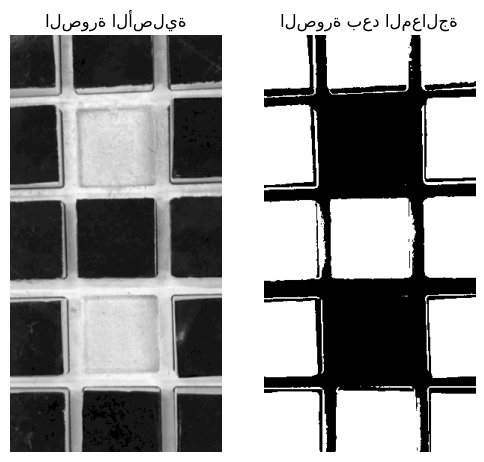

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
أفضل 3 توقعات:
التصنيف: 8, الاحتمال: 0.4698
التصنيف: 5, الاحتمال: 0.1680
التصنيف: 6, الاحتمال: 0.1540


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

def prepare_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"فشل في تحميل الصورة: {image_path}")
        return None
    
    plt.figure(figsize=(6, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("الصورة الأصلية")
    plt.axis('off')
    
    _, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
    
    plt.subplot(1, 2, 2)
    plt.imshow(thresh, cmap='gray')
    plt.title("الصورة بعد المعالجة")
    plt.axis('off')
    
    plt.show()

    resized = cv2.resize(thresh, (28, 28))
    
    resized = resized.reshape(-1, 28, 28, 1) / 255.0
    
    return resized

def predict_image(model, image_path):
    prepared_image = prepare_image(image_path)
    
    if prepared_image is not None:
        prediction = model.predict(prepared_image)
        
        top_3_classes = np.argsort(prediction[0])[::-1][:3]
        top_3_probabilities = prediction[0][top_3_classes]
        
        print("أفضل 3 توقعات:")
        for i in range(3):
            print(f"التصنيف: {top_3_classes[i] + 1}, الاحتمال: {top_3_probabilities[i]:.4f}")

image_path = "C:/Users/zaidb/Desktop/zaid/dataset/test4.png"
model = load_model('numbers.keras')
predict_image(model, image_path)

In [ ]:
import cupy as cp
cp.get_default_memory_pool().free_all_blocks()

In [ ]:
!pip install cupy

In [ ]:
print("asdf")

In [ ]:
s